In [ ]:
%matplotlib widget
from Redpitaya_Simplified_Functions import *
from Higher_Level_Functions import *
import time
import numpy as np
import matplotlib.pyplot as plt
from red_class import *
import scipy as sp

from misc_functions import *

%load_ext autoreload
%autoreload 2


### How you would go about measuring and spesifying parameters
You can directly modify the member properties if you wish to alter them exclusively. Using the set_params() functions sets all parameters that you do not spesify to default values.

In [ ]:
rp = red_class(REDPITAYA_IP)

rp.set_params(
    decimation=128,
    oscillations=7,
    preTriggerSamples=200,
    sampling_delay=1
)

ds = data_set(rp)

ds.set_params(
    iterations=5,
    pre_amp_g=40,
    out_g=0,
    dist=20
)

freq = [100E3 + 50E3*i for i in range(0, 8, 1)]
amp = [0.9 for i in range(len(freq))]

label = "Freq_Sweep_Decimation_128_WithoutAmp"

#temp = ds.Measure(freq, amp, label, writeToDisk=True)

SCPI >> connect(rp-f06501.local:5000) failed: [Errno 11001] getaddrinfo failed
Cannot Connect to Board.


### Constructing using a file path
You can directly construct a data_set object by passing in a file path. This will configure it and the embedded red_class object to match that of the dataset. 

In [4]:

decimation32 = data_set(fileName="decimation_meas/Freq_Sweep_Decimation_32_channel_1__13-10-18.csv")
decimation64 = data_set(fileName="decimation_meas/Freq_Sweep_Decimation_64_channel_1__13-5-23.csv")
decimation128 = data_set(fileName="decimation_meas/Freq_Sweep_Decimation_128_channel_1__12-57-4.csv")

Constructing dataset class from decimation_meas/Freq_Sweep_Decimation_32_channel_1__13-10-18.csv
SCPI >> connect(rp-f06501.local:5000) failed: [Errno 11001] getaddrinfo failed
Cannot Connect to Board.
Constructing dataset class from decimation_meas/Freq_Sweep_Decimation_64_channel_1__13-5-23.csv
SCPI >> connect(rp-f06501.local:5000) failed: [Errno 11001] getaddrinfo failed
Cannot Connect to Board.
Constructing dataset class from decimation_meas/Freq_Sweep_Decimation_128_channel_1__12-57-4.csv
SCPI >> connect(rp-f06501.local:5000) failed: [Errno 11001] getaddrinfo failed
Cannot Connect to Board.


### Plotting/Analysis
Some example code that you can use for analysis. 

**average_features_over_iterations()** averages the features over each iteration. 

If the time-domain plot is all that is desired (for example), you can just use ".Time_Domain()" on the data_set object. 

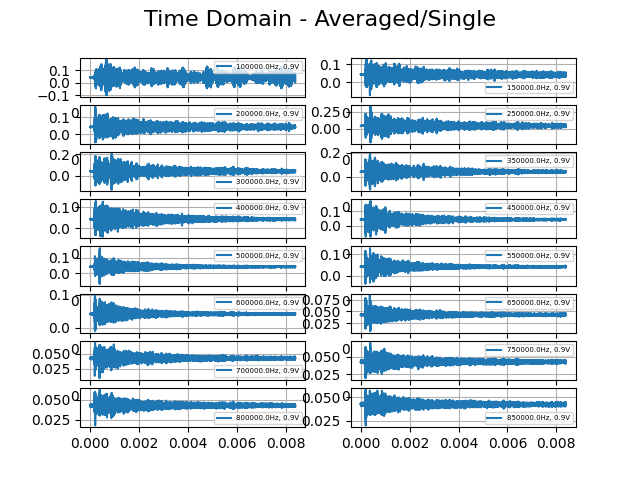

In [ ]:
decimation64.df_1 = decimation64.df_1[decimation64.df_1["Iteration"] == 0] # Filter data for the first iteration

f1 = decimation64.Time_Domain(plot=False);
f2 = decimation64.Frequency_Domain(plot=False);
f3 = decimation64.SNR(plot = False);

f4, ax4 = plt.subplots()
averaged = decimation64.average_features_over_iterations()
ax4.plot(averaged["Excitation Freq"], averaged["rms"])

create_tabbed_figures([f1, f2, f3, f4], ["Time Domain","Frequency Domain", "SNR", "RMS"])


### Some experiemential filtering stuff

In [ ]:


from scipy.ndimage import gaussian_filter1d
from scipy.integrate import cumulative_trapezoid

sig = decimation64.df_1["Signal"][0]

t = [(1/ds.red_object.actualSampleRate)*x for x in range(len(sig))]


# Apply a Gaussian filter to smooth the signal
smoothed_sig = gaussian_filter1d(sig, sigma=2)
# Compute the derivative of the smoothed signal
derivative = np.diff(smoothed_sig)


# Adpative thresholding --------
#noise_segment = np.concatenate((sig[:3], sig[-3:]))
# noise_segment = sig[:DEFAULT_PRE_TRIGGER_SAMPLES]
# mean_noise = np.mean(noise_segment)
# std_noise = np.std(noise_segment)

# threshold = mean_noise + NOISE_THRESHOLD_STD * std_noise  # Adaptive threshold

# start_index = np.argmax(np.abs(smoothed_sig) > threshold)
# end_index = len(derivative) - np.argmax(np.abs(smoothed_sig[::-1]) > threshold)

# Derivative thresholding --------------------
#Define a threshold for the derivative to identify constant regions
derivative_threshold = 1e-3

result = next((x for x in derivative if x > derivative_threshold), None)
start_index = np.argmax(np.abs(derivative) > derivative_threshold)
end_index = len(derivative) - np.argmax(np.abs(derivative[::-1]) > derivative_threshold)
print(derivative_threshold, start_index, end_index)

# Create a mask that only affects the start and end regions
mask = np.ones(len(sig), dtype=bool)
mask[:start_index] = False
mask[end_index:] = False

# Apply the mask to the original signal and time arrays
filtered_sig = np.array(sig)[mask]
filtered_t = np.array(t)[mask]

samplesArrayForDer = [i for i in range(len(derivative))]

# Plotting the filtered signal and its derivative
fig, ax = plt.subplots(4, 1, figsize=(10, 8))

ax[0].plot(t, sig)
ax[0].set(xlabel='time (s)', ylabel='Signal',
          title='Original Signal vs Time')
ax[0].grid()

ax[1].plot(t,smoothed_sig)
ax[1].set(xlabel='time (s)', ylabel='Smoothed Signal',
          title='Smoothed Signal vs Time')
ax[1].grid()



ax[2].plot(samplesArrayForDer, derivative)
ax[2].set(xlabel='time (s)', ylabel='Derivative',
          title='Derivative vs Time')
ax[2].grid()

ax[3].plot(filtered_t, filtered_sig)
ax[3].set(xlabel='time (s)', ylabel='Filtered Signal',
          title='Filtered Signal vs Time')
ax[3].grid()




NameError: name 'sig' is not defined